## F1 Consistency Dashboard
This analysis will evaluate and visualize the consistency of F1 drivers from the past season (2024) based on their lap times and finishing positions from races.

### Steps
1. Find a valid dataset 
    - For the time being, we will use one from Kaggle. In the future, I would like to use an open source API from RapidAI called [Hyprace API](https://rapidapi.com/hyprace-hyprace-default/api/hyprace-api) to get real-time race data for the 2025 season.
2. Import packages and read/load datasets from csv files
3. Clean data and merge datasets
    - Mainly using: lap_times.csv, results.csv, races.csv, drivers.csv
4. Rename and rearrange columns

In [197]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import os

#%matplob lib inline

In [198]:
lap_times = pd.read_csv('/Users/Kat/Documents/repos/F1-Race-Result-Analysis/data/raw/lap_times.csv')
results = pd.read_csv('/Users/Kat/Documents/repos/F1-Race-Result-Analysis/data/raw/results.csv')
races = pd.read_csv('/Users/Kat/Documents/repos/F1-Race-Result-Analysis/data/raw/races.csv')
drivers = pd.read_csv('/Users/Kat/Documents/repos/F1-Race-Result-Analysis/data/raw/drivers.csv')

In [199]:
df = pd.merge(results, races[['raceId','year','name','round']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId','driverRef','number','code','forename','surname']], on='driverId', how='left')
print(df.tail(5))

       resultId  raceId  driverId  constructorId number_x  grid position  \
26953     26959    1154       865            215        6    12       16   
26954     26960    1154       840            117       18    17       17   
26955     26961    1154       846              1        4     7       18   
26956     26962    1154       859            215       30    19       19   
26957     26963    1154       848              3       23     9       20   

      positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
26953           16             16     0.0  ...               \N       11   
26954           17             17     0.0  ...               \N       11   
26955           18             18     0.0  ...               \N        4   
26956            R             19     0.0  ...               \N       25   
26957            R             20     0.0  ...               \N        5   

       year                 name round driverRef number_y  code   forename  \
26953  2

In [200]:
# drop columns
df.drop(['constructorId','number_x','positionText','points','rank','fastestLap','statusId','round','driverRef','number_y'], axis=1, inplace=True)
print(df.tail(5))


       resultId  raceId  driverId  grid position  positionOrder  laps  \
26953     26959    1154       865    12       16             16    69   
26954     26960    1154       840    17       17             17    69   
26955     26961    1154       846     7       18             18    66   
26956     26962    1154       859    19       19             19    53   
26957     26963    1154       848     9       20             20    46   

                time milliseconds fastestLapTime fastestLapSpeed  year  \
26953         +8.737      5521425       1:16.292              \N  2025   
26954         +9.063      5521751       1:14.902              \N  2025   
26955  +-1:52:04.782      5037470       1:14.229              \N  2025   
26956             \N           \N       1:16.320              \N  2025   
26957             \N           \N       1:16.197              \N  2025   

                      name code   forename surname  
26953  Canadian Grand Prix  HAD      Isack  Hadjar  
26954  Can

In [201]:
# get data from only 2024 season
df = df[df['year'] == 2024]
# rearrange columns
df = df[['raceId','year','name','code','forename','surname','grid','position','positionOrder','time','milliseconds','fastestLapTime','fastestLapSpeed','driverId','resultId']]
# sort values
# create excel of merged sets
df.to_excel('/Users/Kat/Documents/repos/F1-Race-Result-Analysis/data/clean/output.xlsx', index=False, engine='openpyxl')

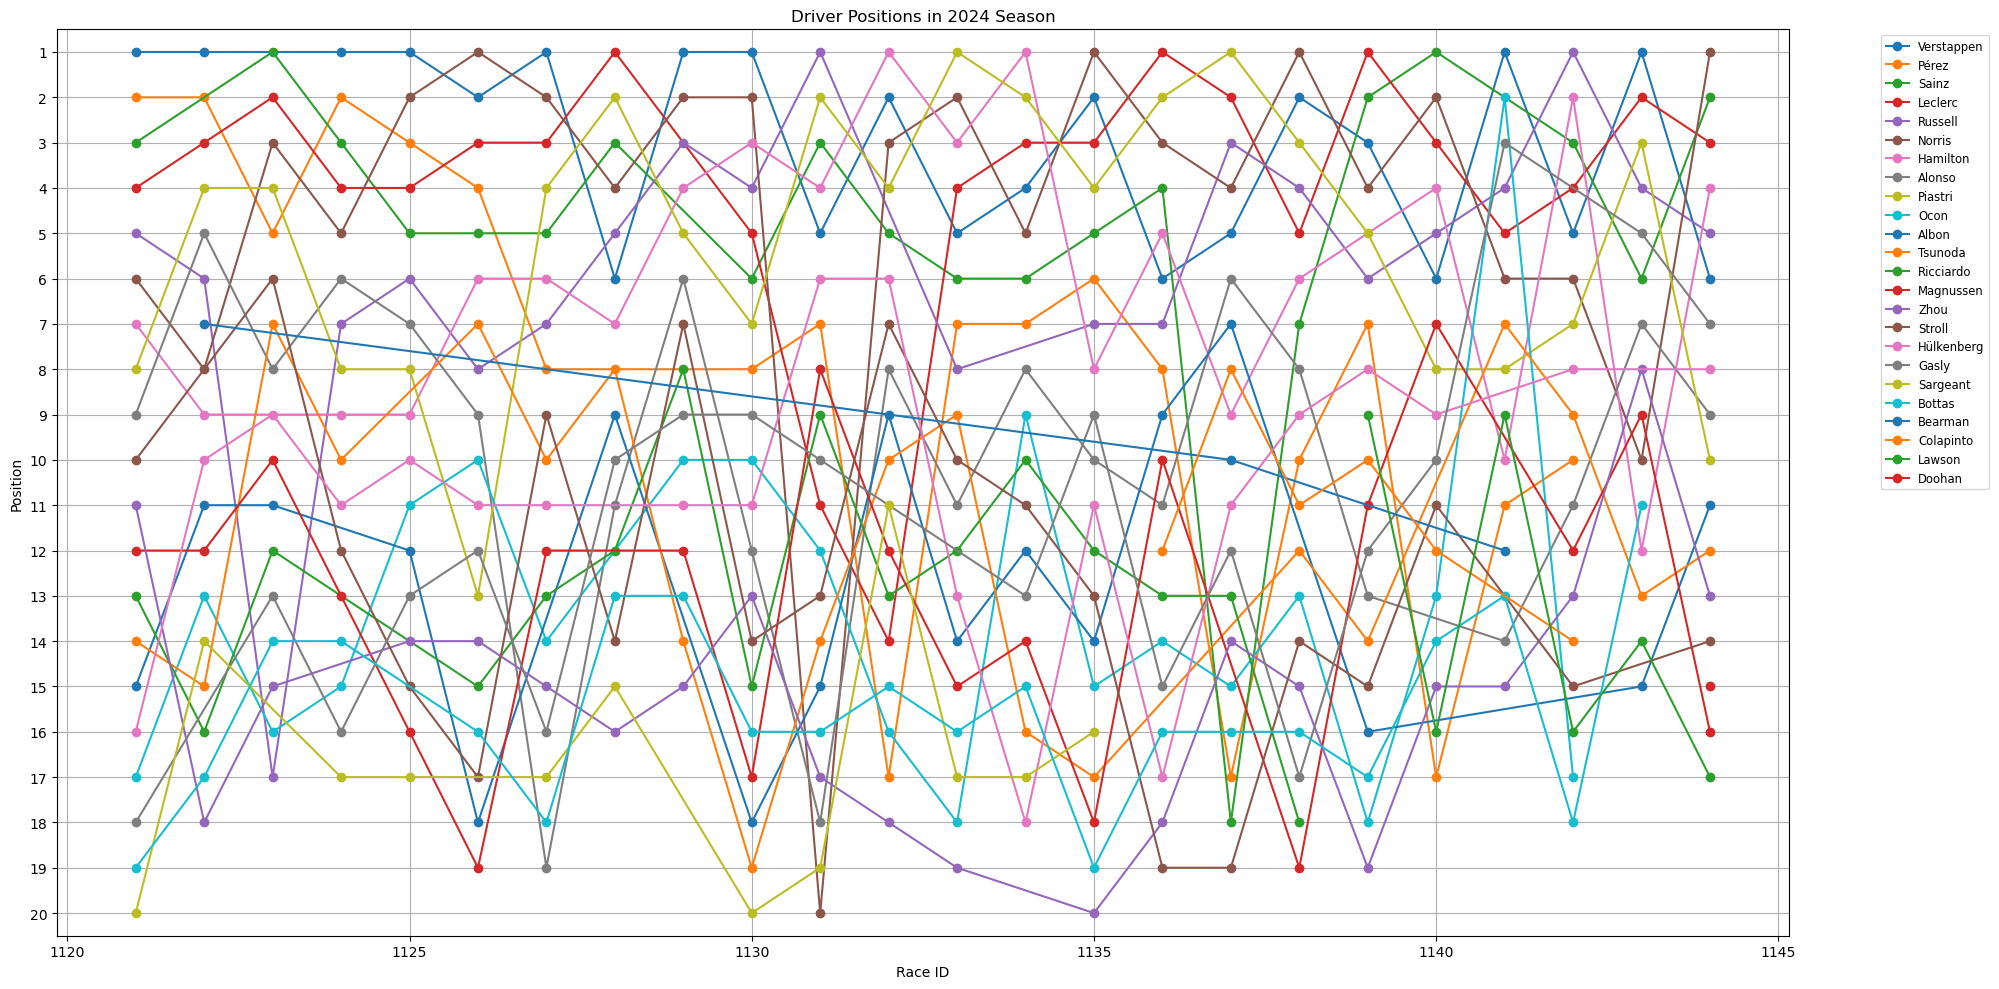

In [202]:
# filter out driver samples
# DNF → NaN (when not finish, do not plot position)

# verstappen_df = df[df['surname'] == 'Verstappen'].sort_values(by=['raceId'])
# verstappen_df['position'] = pd.to_numeric(verstappen_df['position'], errors='coerce')

# leclerc_df = df[df['surname'] == 'Leclerc'].sort_values(by=['raceId'])
# leclerc_df['position'] = pd.to_numeric(leclerc_df['position'], errors='coerce')

# plt.plot(verstappen_df['raceId'], verstappen_df['position'], marker='o', label='Verstappen')
# plt.plot(leclerc_df['raceId'], leclerc_df['position'], marker='o', label='Leclerc')

# plt.figure(figsize=(12, 6))

df['position'] = pd.to_numeric(df['position'], errors='coerce')
df = df.dropna(subset=['position'])
df['position'] = df['position'].astype(int)
df = df.sort_values(by='raceId')

max_position = df['position'].max()

plt.figure(figsize=(20, 10))

for driver in df['surname'].unique():
    driver_df = df[df['surname'] == driver]
    plt.plot(driver_df['raceId'], driver_df['position'], marker='o', label=driver)


plt.xlabel('Race ID')
plt.ylabel('Position')
plt.title('Driver Positions in 2024 Season')
plt.yticks(range(1, max_position + 1))
plt.ylim(max_position + 0.5, 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# driver lap time analysis in correlation with position